# Stroke Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn
import xgboost as xgb

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
train=pd.read_csv('train.csv') # Load train dataset into dataframe

In [4]:
test=pd.read_csv('test.csv') # Load test dataset into dataframe

In [5]:
submission=pd.read_csv('submission.csv') # Load submission dataset into dataframe

# Data Exploration

In [6]:
print('Shape of dataset :',train.shape)
train.head() #overview of the dataset

Shape of dataset : (15304, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [7]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [8]:
train.hypertension = train.hypertension.map({1: 'yes', 0: 'no'}) # Map values in 'hypertension' column
train.heart_disease = train.heart_disease.map({1: 'yes', 0: 'no'}) # Map values in 'heart_disease' column
train.stroke = train.stroke.map({1: 'yes', 0: 'no'}) # Map values in 'stroke' column

train.rename(columns={"gender": "Gender","age": "Age","hypertension":"Hypertension",
        "heart_disease":"Heart Disease","ever_married":"Marital Status","work_type":"Occupation Type",
        "Residence_type":"Residence Type","avg_glucose_level": "Average Glucose Level","bmi":"BMI",
        "smoking_status":"Smoking Status","stroke":"Stroke"}, inplace = True)

# Make visualization and analysis of data easier to interpret

In [9]:
train=train.drop(['id'],axis=1) #Drop unimportant data

In [10]:
#train=train.drop(labels=9363,axis=0)
#train[train['gender']=='Other']

In [11]:
#df.to_csv(r'C:\Users\Boydo\Downloads\dataset_stroke.csv')

In [12]:
train.head(10)

,Gender,Age,Hypertension,Heart Disease,Marital Status,Occupation Type,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
0,Male,28.0,no,no,Yes,Private,Urban,79.53,31.1,never smoked,no
1,Male,33.0,no,no,Yes,Private,Rural,78.44,23.9,formerly smoked,no
2,Female,42.0,no,no,Yes,Private,Rural,103.00,40.3,Unknown,no
3,Male,56.0,no,no,Yes,Private,Urban,64.87,28.8,never smoked,no
4,Female,24.0,no,no,No,Private,Rural,73.36,28.8,never smoked,no
5,Female,34.0,no,no,Yes,Private,Urban,84.35,22.2,Unknown,no
6,Female,53.0,no,no,Yes,Private,Rural,88.97,25.3,never smoked,no
7,Male,78.0,no,yes,Yes,Self-employed,Rural,75.32,24.8,Unknown,no
8,Female,45.0,no,no,Yes,Private,Rural,107.22,34.1,never smoked,no
9,Female,62.0,no,no,Yes,Govt_job,Urban,62.68,18.4,formerly smoked,no


# Visualization

Text(0.5, 1.0, '\nStroke Patients Age Distribution\n')

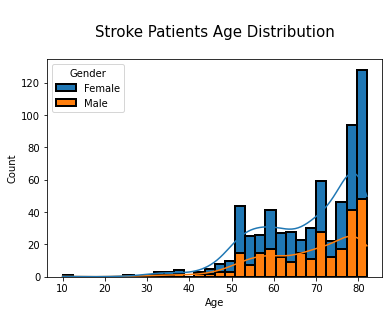

In [13]:
sns.histplot(data=train[train["Stroke"] == "yes"],x="Age",hue="Gender",multiple="stack",kde=True,bins=30,alpha=1,linewidth=2)
plt.title('\nStroke Patients Age Distribution\n',fontsize=15)

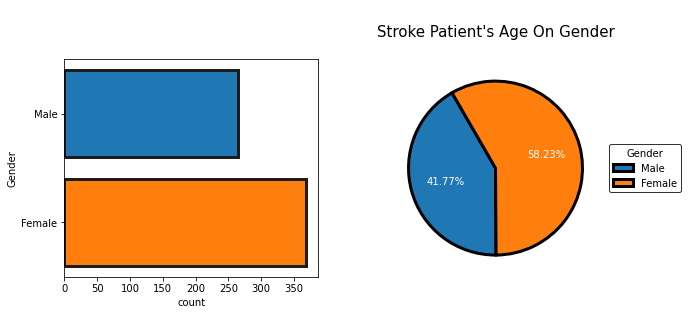

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.countplot(y=train[train["Stroke"]=="yes"]["Gender"],order=train[train["Stroke"]=="yes"]["Gender"].value_counts(ascending=True).index, 
saturation=1, edgecolor = "#1c1c1c", linewidth = 3,ax=ax[0])

plt.title("\nStroke Patient's Age On Gender\n",fontsize=15)

labels = "Male","Female"

plt.pie([train[train["Stroke"] == "yes"]["Gender"].value_counts(ascending=True).values[0],
        train[train["Stroke"] == "yes"]["Gender"].value_counts(ascending=True).values[1]], explode = (0,0),
        textprops=dict(size= 10, color= "white"),
        autopct="%.2f%%",startangle = 120,wedgeprops=dict( edgecolor = "black", linewidth = 3))

plt.legend( labels, title="Gender",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")



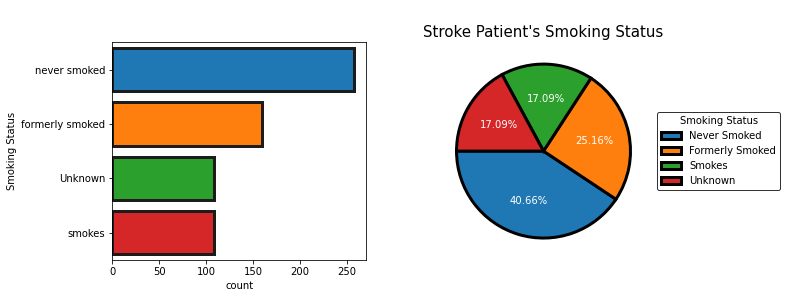

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))


sns.countplot(y=train[train["Stroke"]=="yes"]["Smoking Status"],order=train[train["Stroke"]=="yes"]["Smoking Status"].value_counts(ascending=False).index, 
            saturation=1, edgecolor = "#1c1c1c", linewidth = 3,ax=ax[0])
plt.title("\nStroke Patient's Smoking Status",fontsize=15)

labels = "Never Smoked","Formerly Smoked","Smokes","Unknown"

plt.pie([train[train["Stroke"] == "yes"]["Smoking Status"].value_counts(ascending=False).values[0],
        train[train["Stroke"] == "yes"]["Smoking Status"].value_counts(ascending=False).values[1],
        train[train["Stroke"] == "yes"]["Smoking Status"].value_counts(ascending=False).values[2],
        train[train["Stroke"] == "yes"]["Smoking Status"].value_counts(ascending=False).values[3]],
        textprops=dict(size= 10, color= "white"),autopct="%.2f%%",startangle = 180,wedgeprops=dict( edgecolor = "black", linewidth = 3))

plt.legend(labels, title="Smoking Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")

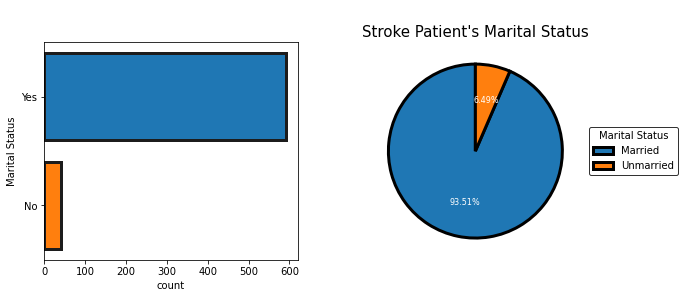

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.countplot(y=train[train["Stroke"]=="yes"]["Marital Status"],order=train[train["Stroke"]=="yes"]["Marital Status"].value_counts(ascending=False).index, 
            saturation=1, edgecolor = "#1c1c1c", linewidth = 3,ax=ax[0])

plt.title("\nStroke Patient's Marital Status",fontsize=15)

labels = "Married","Unmarried"

plt.pie([train[train["Stroke"] == "yes"]["Marital Status"].value_counts(ascending=False).values[0],
        train[train["Stroke"] == "yes"]["Marital Status"].value_counts(ascending=False).values[1]],
        textprops=dict(size= 8, color= "white"),
        autopct="%.2f%%", wedgeprops=dict( edgecolor = "black", linewidth = 3),startangle = 90)

plt.legend( labels, title="Marital Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")


Text(0.5, 1.0, '\nStroke Patients BMI Distribution\n')

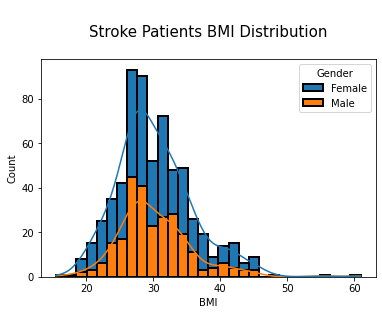

In [17]:
sns.histplot(data=train[train["Stroke"] == "yes"],x="BMI",hue="Gender",multiple="stack",
kde=True,bins=30,alpha=1,fill=True,linewidth=2)
plt.title('\nStroke Patients BMI Distribution\n',fontsize=15)

Text(0.5, 1.0, "\nStroke Patient's Heart Disease")

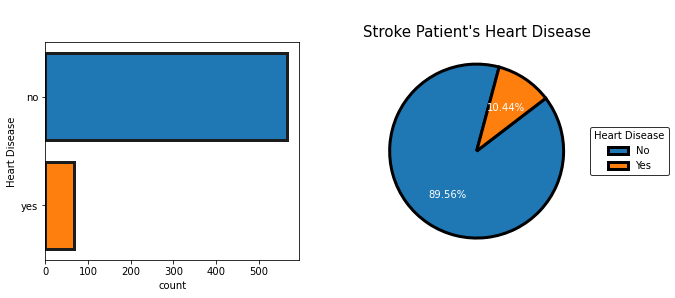

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.countplot(y=train[train["Stroke"]=="yes"]["Heart Disease"],order=train[train["Stroke"]=="yes"]["Heart Disease"].value_counts(ascending=False).index, 
saturation=1, edgecolor = "#1c1c1c", linewidth = 3,ax=ax[0])

labels = "No","Yes"

plt.pie([train[train["Stroke"] == "yes"]["Heart Disease"].value_counts(ascending=False).values[0],
        train[train["Stroke"] == "yes"]["Heart Disease"].value_counts(ascending=False).values[1]],
        textprops=dict(size= 10, color= "white"),
        autopct="%.2f%%", wedgeprops=dict( edgecolor = "black", linewidth = 3),startangle = 75)

plt.legend(labels, title="Heart Disease",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Heart Disease",fontsize=15)

Text(0.5, 1.0, "\nStroke Patient's Hypertension Status")

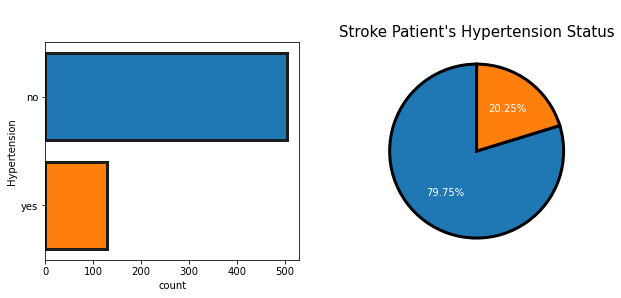

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.countplot(y=train[train["Stroke"]=="yes"]["Hypertension"],order=train[train["Stroke"]=="yes"]["Hypertension"].value_counts(ascending=False).index, 
saturation=1, edgecolor = "#1c1c1c", linewidth = 3,ax=ax[0])

plt.pie([train[train["Stroke"] == "yes"]["Hypertension"].value_counts(ascending=False).values[0],
        train[train["Stroke"] == "yes"]["Hypertension"].value_counts(ascending=False).values[1]],
        textprops=dict(size= 10, color= "white"),autopct="%.2f%%", 
        wedgeprops=dict( edgecolor = "black", linewidth = 3),startangle = 90)
plt.title("\nStroke Patient's Hypertension Status",fontsize=15)
        

Text(0.5, 1.0, '\nStroke Patients Average Glucose Level Distribution\n')

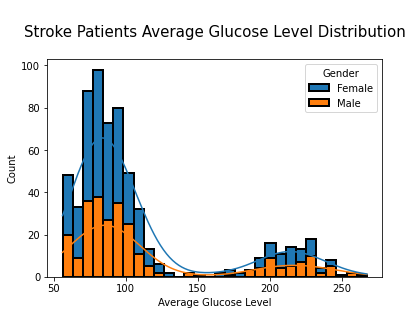

In [20]:
sns.histplot(data=train[train["Stroke"]=="yes"],x="Average Glucose Level",hue="Gender",
            multiple="stack",kde=True,bins=30,alpha=1,fill=True,linewidth=2)
plt.title('\nStroke Patients Average Glucose Level Distribution\n',fontsize=15)

Text(0.5, 1.0, "\nStroke Patient's Occupation Type")

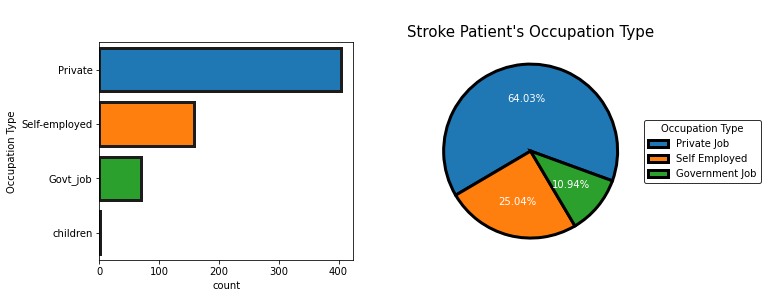

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.countplot(y=train[train["Stroke"]=="yes"]["Occupation Type"],order=train[train["Stroke"]=="yes"]["Occupation Type"].value_counts(ascending=False).index, 
saturation=1, edgecolor = "#1c1c1c", linewidth = 3,ax=ax[0])

labels = "Private Job","Self Employed","Government Job"

plt.pie([train[train["Stroke"] == "yes"]["Occupation Type"].value_counts(ascending=False).values[0],
        train[train["Stroke"] == "yes"]["Occupation Type"].value_counts(ascending=False).values[1],
        train[train["Stroke"] == "yes"]["Occupation Type"].value_counts(ascending=False).values[2]],
        textprops=dict(size= 10, color= "white"),autopct="%.2f%%", 
        wedgeprops=dict( edgecolor = "black", linewidth = 3),startangle = -20)

plt.legend( labels, title="Occupation Type",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Occupation Type",fontsize=15)

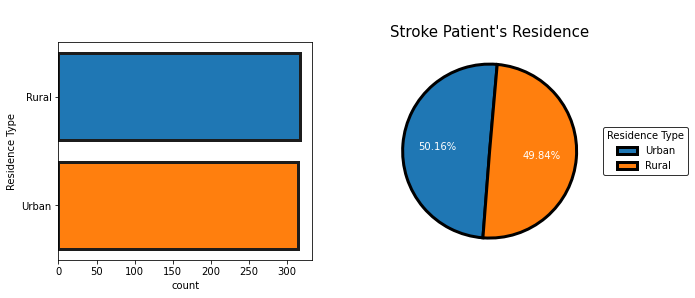

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.countplot(y=train[train["Stroke"]=="yes"]["Residence Type"],order=train[train["Stroke"]=="yes"]["Residence Type"].value_counts(ascending=False).index, 
saturation=1, edgecolor = "#1c1c1c", linewidth = 3,ax=ax[0])

labels = "Urban","Rural"

plt.pie([train[train["Stroke"] == "yes"]["Residence Type"].value_counts(ascending=False).values[0],
                                    train[train["Stroke"] == "yes"]["Residence Type"].value_counts(ascending=False).values[1]],
                                   
                                    textprops=dict(size= 10, color= "white"),
                                    autopct="%.2f%%", 
                                    
                                    wedgeprops=dict( edgecolor = "black", 
                                    linewidth = 3),
                                    startangle = 85)

plt.title("\nStroke Patient's Residence",fontsize=15)

plt.legend(labels, title="Residence Type",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")

# Data Preparation

In [23]:
df=train

In [24]:
print('Number of duplicates data : ',df.duplicated().sum()) # checking duplicated data

Number of duplicates data :  0


In [25]:
missing_data = df.isnull().sum(axis=0) #checking missing value
missing_data = missing_data[missing_data>0]
missing_data

Series([], dtype: int64)

In [26]:
catcol = [col for col in df.columns if df[col].dtype == "object"]
le = LabelEncoder()
label_mapping = {}
for col in catcol:
        df[col] = le.fit_transform(df[col])
        label_mapping[col]= dict(zip(le.classes_,le.transform(le.classes_)))

label_mapping

{'Gender': {'Female': 0, 'Male': 1, 'Other': 2},
 'Hypertension': {'no': 0, 'yes': 1},
 'Heart Disease': {'no': 0, 'yes': 1},
 'Marital Status': {'No': 0, 'Yes': 1},
 'Occupation Type': {'Govt_job': 0,
  'Never_worked': 1,
  'Private': 2,
  'Self-employed': 3,
  'children': 4},
 'Residence Type': {'Rural': 0, 'Urban': 1},
 'Smoking Status': {'Unknown': 0,
  'formerly smoked': 1,
  'never smoked': 2,
  'smokes': 3},
 'Stroke': {'no': 0, 'yes': 1}}

# Correlation

In [27]:
df.columns

Index(['Gender', 'Age', 'Hypertension', 'Heart Disease', 'Marital Status',
       'Occupation Type', 'Residence Type', 'Average Glucose Level', 'BMI',
       'Smoking Status', 'Stroke'],
      dtype='object')

In [28]:
df2=df.corr().Stroke.reset_index().sort_values(by='Stroke',ascending=False)
df2

,index,Stroke
10,Stroke,1.000000
1,Age,0.261320
7,Average Glucose Level,0.149273
2,Hypertension,0.145895
4,Marital Status,0.114010
3,Heart Disease,0.111518
8,BMI,0.065393
9,Smoking Status,0.036189
0,Gender,0.014889
6,Residence Type,-0.000331


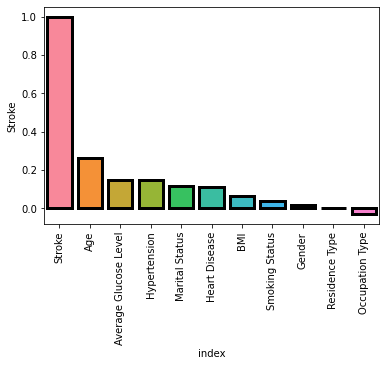

In [29]:
chart = sns.barplot(data=df2,x="index",y="Stroke",saturation=1, edgecolor = "#000000", linewidth = 3)

for item in chart.get_xticklabels():
  item.set_rotation(90)

<AxesSubplot:>

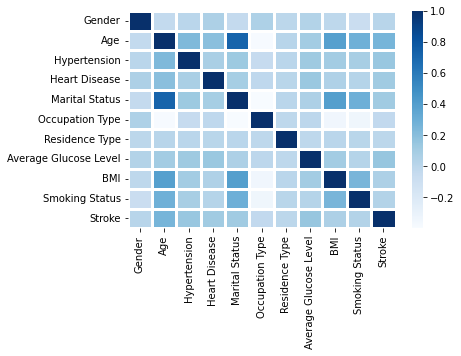

In [30]:
sns.heatmap(df.corr(),cmap="Blues", edgecolor = "#1c1c1c", linewidth = 3)

# Machine Learning

In [31]:
X=df.drop(columns=['Stroke','Residence Type','Smoking Status'],axis=1)
y=df[['Stroke']].values.reshape(-1,1)

import imblearn

from imblearn.over_sampling import RandomOverSampler

random_sampler=RandomOverSampler(sampling_strategy=0.5)
X_over,y_over=random_sampler.fit_resample(X,y)

train_X,test_X,train_y,test_y = train_test_split(X_over, y_over,test_size=0.2,random_state=0)

Logistic Regresion

In [32]:
lr=LogisticRegression()
lr.fit(train_X,train_y)
cv_scores = cross_val_score(lr, X_over, y_over, cv=5) # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.8162199  0.82030895 0.80440709 0.80799818 0.81663258]


In [33]:
lr_pred = lr.predict(test_X) #Predict on the test dataset

lr_conf = confusion_matrix(test_y, lr_pred) # Confusion Matrix
lr_report = classification_report(test_y, lr_pred) #Classification Report
lr_acc = round(accuracy_score(test_y, lr_pred)*100, ndigits = 2) #Accuracy Score
lr_rocauc=roc_auc_score(test_y, lr_pred) #ROC AUC Score

#Print the results
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Reggresion is {lr_acc} %")
print(f'ROC AUC score wiht Logistic Reggresion: {lr_rocauc}')

Confusion Matrix : 

[[2594  342]
 [ 449 1017]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2936
           1       0.75      0.69      0.72      1466

    accuracy                           0.82      4402
   macro avg       0.80      0.79      0.79      4402
weighted avg       0.82      0.82      0.82      4402


The Accuracy of Logistic Reggresion is 82.03 %
ROC AUC score wiht Logistic Reggresion: 0.7886197032835088


Decision Tree

In [34]:
dtr=DecisionTreeClassifier()
dtr.fit(train_X,train_y)
cv_scores = cross_val_score(dtr, X_over, y_over, cv=5,scoring='accuracy')  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.97455702 0.97455702 0.97114948 0.97386958 0.97477846]


In [35]:
dtr_pred=dtr.predict(test_X) # Predictions on the test set

dtr_conf=confusion_matrix(test_y,dtr_pred) # Confusion Matrix
dtr_report=classification_report(test_y,dtr_pred) # Classification Report
dtr_acc=round(accuracy_score(test_y,dtr_pred)*100,ndigits=3) # Accuracy Score
dtr_rocauc=roc_auc_score(test_y, dtr_pred) #ROC AUC score

# Print the result
print(f"Confusion Matrix : \n\n{dtr_conf}")
print(f"\nClassification Report : \n\n{dtr_report}")
print(f"\nThe Accuracy of Decision Tree is {dtr_acc} %")
print(f'ROC AUC Score with Decision Tree: {dtr_rocauc}')

Confusion Matrix : 

[[2837   99]
 [   0 1466]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2936
           1       0.94      1.00      0.97      1466

    accuracy                           0.98      4402
   macro avg       0.97      0.98      0.98      4402
weighted avg       0.98      0.98      0.98      4402


The Accuracy of Decision Tree is 97.751 %
ROC AUC Score with Decision Tree: 0.9831403269754768


Random Forest

In [36]:
rfc = RandomForestClassifier() 
rfc.fit(train_X,train_y)
cv_scores = cross_val_score(rfc, X_over, y_over, cv=5, scoring='accuracy')  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')


Cross-Validation Scores: [0.98727851 0.98614266 0.98318946 0.98523063 0.98318564]


In [37]:
rfc_pred = rfc.predict(test_X) # Predict on the test data set

rfc_conf = confusion_matrix(test_y, rfc_pred) #Confusion Matrix
rfc_report = classification_report(test_y, rfc_pred) # Classification Report
rfc_acc = round(accuracy_score(test_y, rfc_pred)*100, ndigits = 2) # Accuracy Score
rfc_rocauc=roc_auc_score(test_y, rfc_pred) #ROC AUC Score

#Print the results
print(f"Confusion Matrix : \n\n{rfc_conf}")
print(f"\nClassification Report : \n\n{rfc_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfc_acc} %")
print(f'ROC AUC score wiht Random Forest: {rfc_rocauc}')

Confusion Matrix : 

[[2885   51]
 [   0 1466]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2936
           1       0.97      1.00      0.98      1466

    accuracy                           0.99      4402
   macro avg       0.98      0.99      0.99      4402
weighted avg       0.99      0.99      0.99      4402


The Accuracy of Random Forest Classifier is 98.84 %
ROC AUC score wiht Random Forest: 0.9913147138964578


Gradien

In [38]:
gradien=GradientBoostingClassifier()
gradien.fit(train_X,train_y)
cv_scores = cross_val_score(gradien, X_over, y_over, cv=5,scoring='accuracy')  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.84007269 0.83870968 0.82825988 0.83708248 0.83844581]


In [39]:
gradien_pred=gradien.predict(test_X) # Predict on the test dataset

gradien_conf=confusion_matrix(test_y,gradien_pred) #Confusion Matrix
gradien_report=classification_report(test_y,gradien_pred) #Classification Matrix
gradien_acc=round(accuracy_score(test_y,gradien_pred)*100,ndigits=3) # Accuracy Score
gradien_rocauc=roc_auc_score(test_y, gradien_pred) #ROC AUC Score

# Print the results
print(f"Confusion Matrix : \n\n{gradien_conf}")
print(f"\nClassification Report : \n\n{gradien_report}")
print(f"\nThe Accuracy of Gradien Boost is {gradien_acc} %")
print(f'ROC AUC score wiht Gradien Boost: {gradien_rocauc}')

Confusion Matrix : 

[[2616  320]
 [ 361 1105]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2936
           1       0.78      0.75      0.76      1466

    accuracy                           0.85      4402
   macro avg       0.83      0.82      0.82      4402
weighted avg       0.84      0.85      0.84      4402


The Accuracy of Gradien Boost is 84.53 %
ROC AUC score wiht Gradien Boost: 0.8223799398537607


SGD

Gaussian Naive Bayes

In [40]:
gnb=GaussianNB()
gnb.fit(train_X,train_y)
cv_scores = cross_val_score(gnb, X_over, y_over, cv=3,scoring='accuracy')  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.7558615  0.75654308 0.76308615]


In [41]:
gnb_pred=gnb.predict(test_X)
gnb_conf=confusion_matrix(test_y,gnb_pred)
gnb_report=classification_report(test_y,gnb_pred)
gnb_acc=round(accuracy_score(test_y,gnb_pred)*100,ndigits=3)
gnb_rocauc=roc_auc_score(test_y, gnb_pred)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian is {gnb_acc} %")
print(f'ROC AUC Score with Gaussian Naive Bayes: {gnb_rocauc}',)

Confusion Matrix : 

[[2679  257]
 [ 780  686]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.77      0.91      0.84      2936
           1       0.73      0.47      0.57      1466

    accuracy                           0.76      4402
   macro avg       0.75      0.69      0.70      4402
weighted avg       0.76      0.76      0.75      4402


The Accuracy of Gaussian is 76.443 %
ROC AUC Score with Gaussian Naive Bayes: 0.6902029563846831


XGBoost Classifier

In [42]:
xgboost= XGBClassifier()
xgboost.fit(train_X,train_y)
cv_scores = cross_val_score(xgboost, X_over, y_over, cv=5, scoring='accuracy')  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.96592458 0.96547024 0.95797365 0.95501022 0.95660077]


In [43]:
xgboost_pred = xgboost.predict(test_X) # Predictions on the test set

xgboost_conf = confusion_matrix(test_y, xgboost_pred) # Confusion Matrix
xgboost_report = classification_report(test_y, xgboost_pred) # Classification Report
xgboost_acc = round(accuracy_score(test_y, xgboost_pred) * 100, ndigits=3) # Accuracy Score
xgboost_rocauc = roc_auc_score(test_y, xgboost_pred) # ROC AUC Score

# Print Results
print(f"Confusion Matrix : \n\n{xgboost_conf}")
print(f"\nClassification Report : \n\n{xgboost_report}")
print(f"\nThe Accuracy of XGB is {xgboost_acc} %")
print(f'ROC AUC Score with XGBOOST: {xgboost_rocauc}')


Confusion Matrix : 

[[2788  148]
 [   8 1458]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2936
           1       0.91      0.99      0.95      1466

    accuracy                           0.96      4402
   macro avg       0.95      0.97      0.96      4402
weighted avg       0.97      0.96      0.96      4402


The Accuracy of XGB is 96.456 %
ROC AUC Score with XGBOOST: 0.9720671273665388


In [44]:
results = pd.DataFrame([["XGBoost Classifier", xgboost_acc, xgboost_rocauc],
                        ["Decision Tree Classifier", dtr_acc, dtr_rocauc], 
                        ["Gaussian naive bayes classifier", gnb_acc, gnb_rocauc],
                        ["Gradien Boost Classifier", gradien_acc, gradien_rocauc],
                        ["Random Forest Classifier", rfc_acc, rfc_rocauc],
                        ["Logistic Regression",lr_acc,lr_rocauc]],
                        columns = ["Models", "Testing Accuracy Score", "ROC AUC Score"])

results.sort_values(by=['ROC AUC Score'], ascending=False).style.background_gradient(cmap='YlOrRd')

,Models,Testing Accuracy Score,ROC AUC Score
4,Random Forest Classifier,98.840000,0.991315
1,Decision Tree Classifier,97.751000,0.983140
0,XGBoost Classifier,96.456000,0.972067
3,Gradien Boost Classifier,84.530000,0.822380
5,Logistic Regression,82.030000,0.788620
2,Gaussian naive bayes classifier,76.443000,0.690203


# Submission

In [45]:
X_test=test.drop(['id','smoking_status','Residence_type'],1)

In [46]:
catcol=[col for col in X_test.columns if X_test[col].dtype == 'object']
label_mapping = {}
for col in catcol:
    X_test[col]=le.fit_transform(X_test[col])
    label_mapping[col] = dict(zip(le.classes_,le.transform(le.classes_)))
    
label_mapping

{'gender': {'Female': 0, 'Male': 1, 'Other': 2},
 'ever_married': {'No': 0, 'Yes': 1},
 'work_type': {'Govt_job': 0,
  'Never_worked': 1,
  'Private': 2,
  'Self-employed': 3,
  'children': 4}}

In [47]:
test_X.shape, X_test.shape

((4402, 8), (10204, 8))

In [48]:
test_pred=rfc.predict(X_test)

In [49]:
submission['stroke'] = test_pred

submission

,id,stroke
0,15304,0
1,15305,0
2,15306,0
3,15307,0
4,15308,0
...,...,...
10199,25503,0
10200,25504,0
10201,25505,0
10202,25506,0


In [50]:
submission.to_csv('submission.csv',index = False)